# Manufacturer Safety Profile Comparison

**Purpose**: Compare adverse event profiles across manufacturers  
**Data**: 2020-2023 (4 years), device + master  
**Research Question**: How do safety profiles differ across manufacturers?

## What You'll Learn

- Compare event counts by manufacturer
- Analyze event type distributions
- Temporal patterns by manufacturer
- Statistical considerations for comparisons

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent / 'src'))

from maude_db import MaudeDatabase
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
db = MaudeDatabase('manufacturer_comparison.db', verbose=True)

db.add_years(
    years='2020-2023',
    tables=['device', 'master'],
    download=True,
    data_dir='./maude_data'
)


Grouping years by file for optimization...

  Using cached device2022.zip
  Using cached device2023.zip
  Using mdrfoithru2024.zip instead (latest available cumulative file).

Processing data files...

Loading device for year 2020...
    Identified date columns: DATE_REMOVED_FLAG, IMPLANT_DATE_YEAR, DATE_REMOVED_YEAR, DATE_RECEIVED, EXPIRATION_DATE_OF_DEVICE, DATE_RETURNED_TO_MANUFACTURER
    Processed 1,100,000 rows...
    Total: 1,567,925 rows

Loading device for year 2021...
    Identified date columns: DATE_REMOVED_FLAG, IMPLANT_DATE_YEAR, DATE_REMOVED_YEAR, DATE_RECEIVED, EXPIRATION_DATE_OF_DEVICE, DATE_RETURNED_TO_MANUFACTURER
    Processed 1,100,000 rows...
    Processed 2,032,838 rows...
    Total: 2,032,838 rows

Loading device for year 2022...
    Identified date columns: DATE_REMOVED_FLAG, IMPLANT_DATE_YEAR, DATE_REMOVED_YEAR, DATE_RECEIVED, EXPIRATION_DATE_OF_DEVICE, DATE_RETURNED_TO_MANUFACTURER
    Processed 1,100,000 rows...
    Processed 2,100,000 rows...
    Total: 2,

/Users/jakeumms/University of Michigan Dropbox/Jacob Schwartz/eras reserach projects/MAUDE thrombectomy devices /scripts/maude_db/src/maude_db/processors.py:255: ParserWarning: Skipping line 843808: Expected 86 fields in line 843808, saw 87

  for i, chunk in enumerate(pd.read_csv(


    Scanned 1,099,999 rows, kept 1...
    Scanned 2,099,999 rows, kept 1...
    Scanned 3,099,999 rows, kept 471,816...
    Scanned 4,099,999 rows, kept 1,471,392...


/Users/jakeumms/University of Michigan Dropbox/Jacob Schwartz/eras reserach projects/MAUDE thrombectomy devices /scripts/maude_db/src/maude_db/processors.py:255: ParserWarning: Skipping line 4432107: Expected 86 fields in line 4432107, saw 87

  for i, chunk in enumerate(pd.read_csv(


    Scanned 5,099,998 rows, kept 2,471,026...
    Scanned 6,099,998 rows, kept 3,470,651...


/Users/jakeumms/University of Michigan Dropbox/Jacob Schwartz/eras reserach projects/MAUDE thrombectomy devices /scripts/maude_db/src/maude_db/processors.py:255: ParserWarning: Skipping line 6128100: Expected 86 fields in line 6128100, saw 87

  for i, chunk in enumerate(pd.read_csv(


    Scanned 7,099,997 rows, kept 4,470,398...
    Scanned 8,099,997 rows, kept 5,470,343...
    Scanned 9,099,997 rows, kept 6,470,338...
    Scanned 10,099,997 rows, kept 7,470,336...
    Scanned 11,099,997 rows, kept 8,470,335...
    Scanned 12,099,997 rows, kept 8,878,787...
    Scanned 13,099,997 rows, kept 8,878,788...
    Scanned 14,099,997 rows, kept 8,878,788...
    Scanned 15,099,997 rows, kept 8,878,789...
    Scanned 16,099,997 rows, kept 8,878,790...
    Scanned 17,099,997 rows, kept 8,878,790...
    Scanned 18,099,997 rows, kept 8,878,790...
    Scanned 19,099,997 rows, kept 8,878,790...
    Scanned 20,099,997 rows, kept 8,878,790...
    Total: Scanned 20,747,247 rows, loaded 8,878,790 rows for 4 years
    Per-year breakdown:
      2020: 1,564,999 rows
      2021: 2,028,313 rows
      2022: 2,945,665 rows
      2023: 2,339,813 rows

Creating indexes...

Database update complete


## 1. Query Device Category

Let's analyze pacemakers across manufacturers.

In [3]:
# Query all pacemaker events
results = db.query_device(device_name='pacemaker')
print(f"Total pacemaker events: {len(results):,}")

# Show sample
results[['MDR_REPORT_KEY', 'GENERIC_NAME', 'MANUFACTURER_D_NAME', 'EVENT_TYPE']].head()

Total pacemaker events: 234,330


,MDR_REPORT_KEY,MDR_REPORT_KEY,GENERIC_NAME,MANUFACTURER_D_NAME,EVENT_TYPE
0,9537117,9537117,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",M
1,9537119,9537119,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN
2,9537127,9537127,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN
3,9537129,9537129,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN
4,9537130,9537130,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN


## 2. Top Manufacturers by Event Count

                         manufacturer  event_count
0                                MPRI        71233
1  ST. JUDE MEDICAL, INC.(CRM-SYLMAR)        48035
2       BOSTON SCIENTIFIC CORPORATION        36748
3            ZOLL MEDICAL CORPORATION        13437
4                     MEDTRONIC, INC.        12389
5                              ABBOTT        11032
6      MEDTRONIC SINGAPORE OPERATIONS        10977
7                           MEDTRONIC         6194
8                   MEDTRONIC IRELAND         6180
9                    ST. JUDE MEDICAL         3714


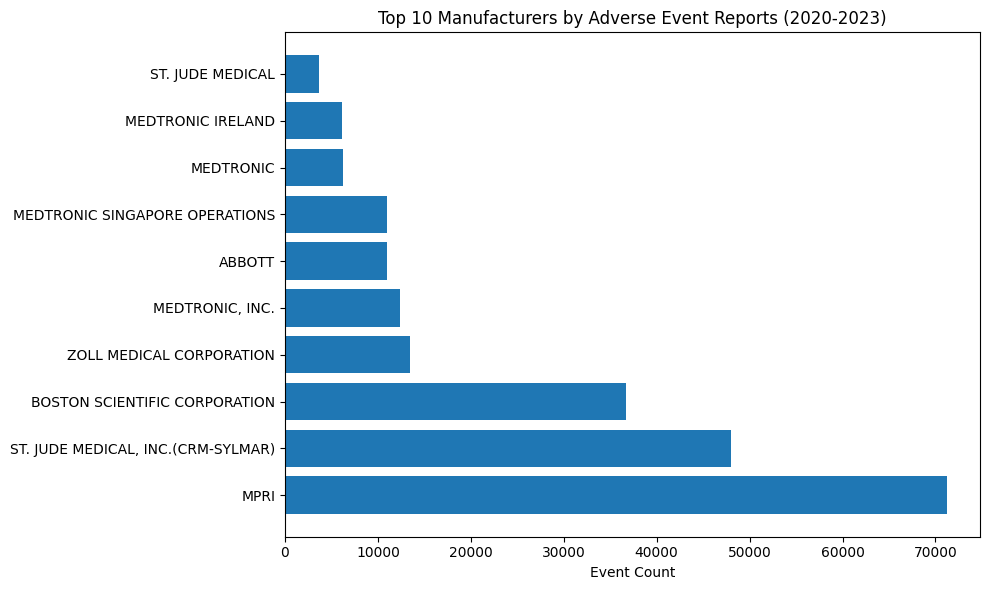

In [4]:
# Get top 10 manufacturers
top_mfg = db.top_manufacturers_for(results, n=10)
print(top_mfg)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(top_mfg['manufacturer'], top_mfg['event_count'])
plt.xlabel('Event Count')
plt.title('Top 10 Manufacturers by Adverse Event Reports (2020-2023)')
plt.tight_layout()
plt.show()

## 3. Event Type Breakdown by Manufacturer

Compare deaths, injuries, and malfunctions across top manufacturers.

In [5]:
# Get event type breakdown for each manufacturer
top_5_mfg = top_mfg.head(5)['manufacturer'].tolist()

comparison_data = []
for mfg in top_5_mfg:
    mfg_events = results[results['MANUFACTURER_D_NAME'] == mfg]
    breakdown = db.event_type_breakdown_for(mfg_events)
    comparison_data.append({
        'Manufacturer': mfg,
        'Total': breakdown['total'],
        'Deaths': breakdown['deaths'],
        'Injuries': breakdown['injuries'],
        'Malfunctions': breakdown['malfunctions']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

                         Manufacturer  Total  Deaths  Injuries  Malfunctions
0                                MPRI  71233       0         0             0
1  ST. JUDE MEDICAL, INC.(CRM-SYLMAR)  48035       0         0             0
2       BOSTON SCIENTIFIC CORPORATION  36748       0         0             0
3            ZOLL MEDICAL CORPORATION  13437       0         0             0
4                     MEDTRONIC, INC.  12389       0         0             0


## 4. Statistical Considerations

**Important**: Higher event counts may reflect:
- Larger market share (more devices in use)
- Better reporting practices
- Longer time on market
- Different device types/indications

**For fair comparison, normalize by:**
- Market share (devices sold)
- Device-years of exposure
- Device risk class

In [6]:
db.close()
print("\n✓ Analysis complete!")
print("See notebook 06 for signal detection techniques.")


✓ Analysis complete!
See notebook 06 for signal detection techniques.
